### NMF applied to Wikipedia articles

In [9]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('..\\datasets\\Wikipedia articles\\wikipedia-vectors.csv', index_col=0)
print(df.transpose().head)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
print(df.columns)

<bound method NDFrame.head of                                                   0        1         2      \
HTTP 404                                       0.000000  0.00000  0.000000   
Alexa Internet                                 0.000000  0.00000  0.029607   
Internet Explorer                              0.000000  0.00000  0.000000   
HTTP cookie                                    0.000000  0.00000  0.000000   
Google Search                                  0.000000  0.00000  0.000000   
Tumblr                                         0.000000  0.00000  0.000000   
Hypertext Transfer Protocol                    0.000000  0.00000  0.000000   
Social search                                  0.000000  0.00000  0.000000   
Firefox                                        0.000000  0.00000  0.000000   
LinkedIn                                       0.000000  0.00000  0.000000   
Global warming                                 0.000000  0.00000  0.000000   
Nationally Appropriate Mitigation 

In [10]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)
print(articles.shape)
print(nmf_features.shape)
# Print the NMF features
print(nmf_features.round(2))

(60, 13125)
(60, 6)
[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0

In [3]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

# When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. 
# This means that both articles are reconstructed using mainly the 3rd NMF component

0    0.003815
1    0.000000
2    0.000000
3    0.571890
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419581
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### NMF learns topics of documents

In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognize the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [11]:
# Import pandas
import pandas as pd
import numpy as np
# Create a DataFrame: components_df
words = np.loadtxt('..\\datasets\\Wikipedia articles\\wikipedia-vocabulary-utf8.txt', dtype=str)
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
film       0.632110
award      0.254836
starred    0.246938
role       0.212876
actress    0.187654
Name: 3, dtype: float64


### Explore the LED digits dataset
In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


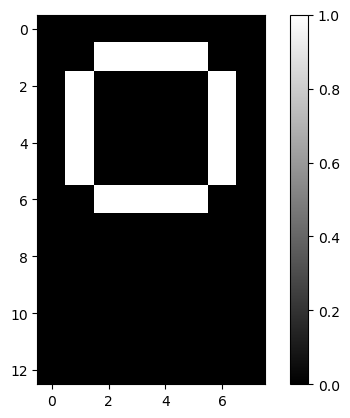

In [14]:
# Import pyplot
from matplotlib import pyplot as plt

samples = pd.read_csv('..\\datasets\\lcd-digits.csv', delimiter=',').values
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


### NMF learns the parts of images

In [15]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

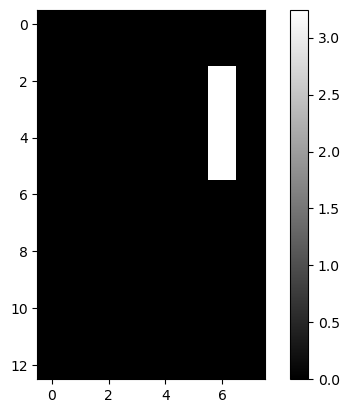

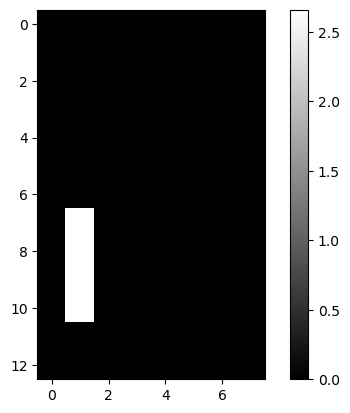

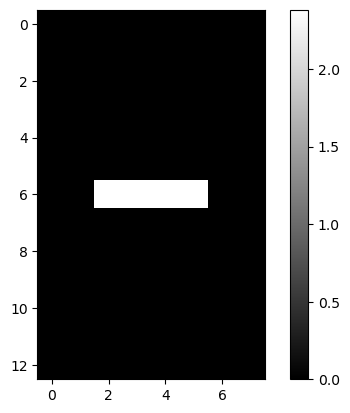

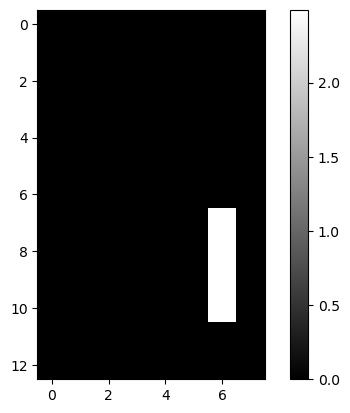

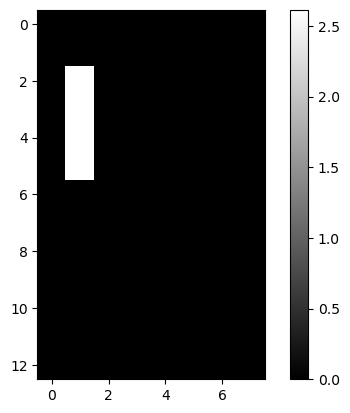

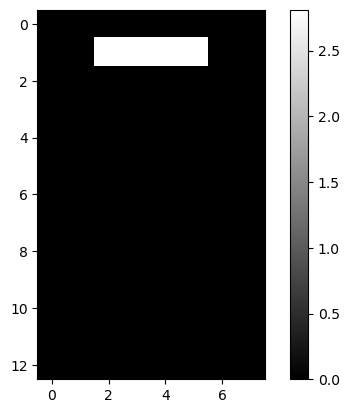

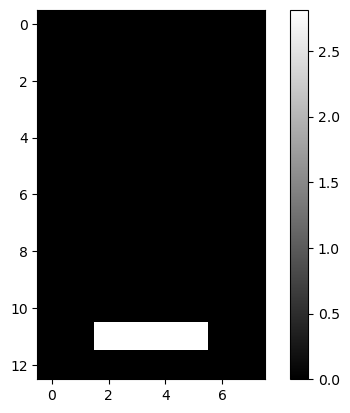

[0.30803295 0.         0.41983154 0.         0.38250586 0.35578764
 0.        ]


In [16]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

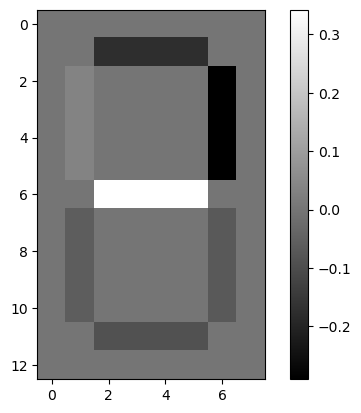

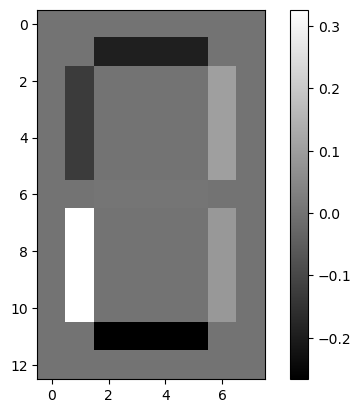

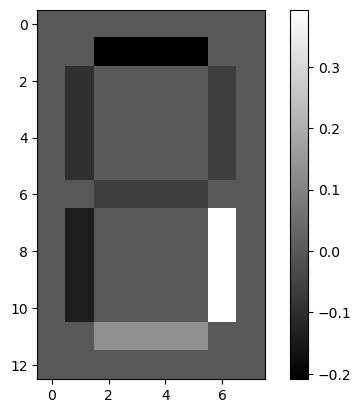

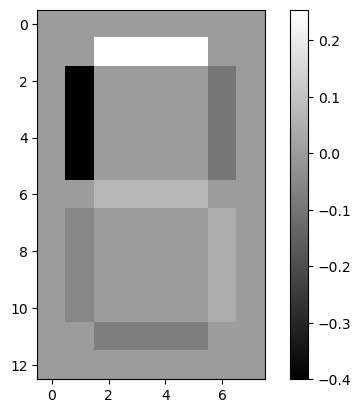

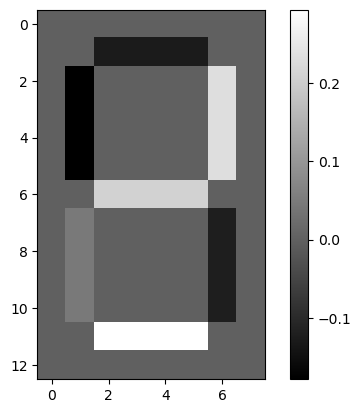

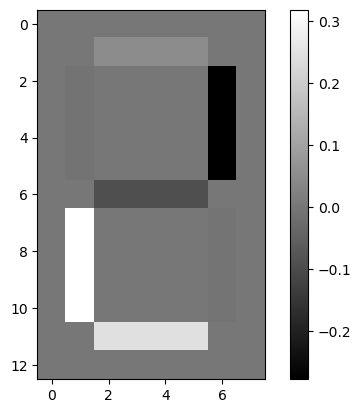

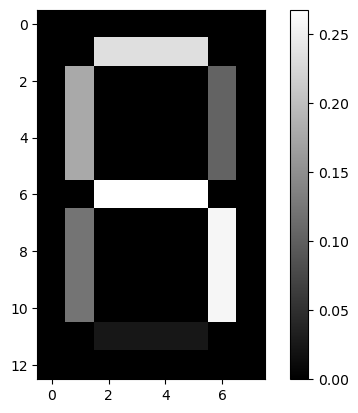

In [17]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

### Which articles are similar to 'Cristiano Ronaldo'?
In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles

In [18]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [29]:
# Preprocesing :
from scipy.sparse import coo_matrix

#df = pd.read_csv('..\\datasets\\Musical artists\\artists.csv', index_col=0)
df = pd.read_csv('..\\datasets\\Musical artists\\scrobbler-small-sample.csv')

artists1 = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = coo_matrix((data1, (row_ind, col_ind)))

  (0, 2)	105
  (0, 15)	165
  (0, 20)	91
  (0, 21)	98
  (0, 29)	120
  (0, 48)	236
  (0, 70)	67
  (0, 95)	77
  (0, 96)	93
  (0, 109)	98
  (0, 113)	63
  (0, 126)	63
  (0, 127)	429
  (0, 130)	151
  (0, 132)	103
  (0, 152)	83
  (0, 153)	65
  (0, 162)	54
  (0, 181)	456
  (0, 183)	592
  (0, 186)	111
  (0, 193)	158
  (0, 194)	53
  (0, 195)	216
  (0, 201)	89
  :	:
  (109, 444)	82
  (109, 450)	271
  (109, 467)	107
  (109, 472)	130
  (109, 478)	776
  (109, 483)	66
  (109, 498)	55
  (110, 56)	51
  (110, 60)	272
  (110, 119)	156
  (110, 149)	87
  (110, 165)	112
  (110, 291)	104
  (110, 325)	183
  (110, 345)	106
  (110, 358)	80
  (110, 360)	111
  (110, 361)	57
  (110, 414)	92
  (110, 429)	60
  (110, 433)	388
  (110, 460)	66
  (110, 463)	105
  (110, 465)	128
  (110, 468)	69


In [30]:


# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [ ]:
#Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? 
# Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. 
# A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. 
# The names of the musical artists are available as the list artist_names

In [37]:
# Import pandas
import pandas as pd

df = pd.read_csv('..\\datasets\\Musical artists\\artists.csv', header=None)
artist_names = df.values.reshape(111).tolist()

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Bruce Springsteen    1.000000
Leonard Cohen        0.961634
Neil Young           0.949487
The Beach Boys       0.858348
Van Morrison         0.836603
dtype: float64
